In [59]:
from ast import literal_eval

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [61]:
df = pd.read_csv("gurgaon_10kk_cleaned_Fvinal_v2.csv")
df.head()

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,PURPOSE,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS
0,70597758,h70597758,gurgaon,31900000.0,31900000,31900000,20202.0,1579.0,146.69 sq.m.,146.693837,146.693837,20202.0,9.0,"['1 metro station', '1 shopping', '2 connectiv...",3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,5,25.0,n,3.0,NaN,la vida by tata housing,NaN,1.0,28.532594,77.020297,3.0,Sale,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN
1,70436188,h70436188,gurgaon,18500000.0,18500000,18500000,9135.0,2025.0,188.13 sq.m.,188.128575,188.128575,9135.0,12.0,"['1 metro station', '1 shopping', '1 connectiv...",3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,0,6,24.0,n,3.0,NaN,emaar palm heights,NaN,1.0,28.385577,76.975992,3.0,Rent,sector 77 gurgaon,emaar palm heights,emaar palm heights,NaN
2,70217014,l70217014,gurgaon,120600000.0,120600992,120600992,42736.0,2822.0,262.17 sq.m.,262.172266,262.172266,42736.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,not available,0,5,20.0,n,5.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,5.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN
3,70217012,x70217012,gurgaon,95300000.0,95258544,95258544,42736.0,2229.0,207.08 sq.m.,207.080787,207.080787,42736.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,not available,0,5,20.0,n,4.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,4.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN
4,70217010,a70217010,gurgaon,72000000.0,72150764,71800092,43834.0,16381646.0,152.18-152.92 sq.m.,152.918338,152.175114,43834.0,9.0,"['1 metro station', '1 shopping', '1 connectiv...",3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,0,5,20.0,n,3.0,NaN,tulip monsella,NaN,1.0,28.435057,77.101367,3.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN


In [62]:
df.shape

(10152, 35)

In [63]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
MAX_PRICE                        0
MIN_PRICE                        0
PRICE_SQFT                       0
AREA                             0
SECONDARY_AREA                   0
MAX_AREA_SQFT                    0
MIN_AREA_SQFT                    0
PRICE_PER_UNIT_AREA              0
TOTAL_LANDMARK_COUNT           111
FORMATTED_LANDMARK_DETAILS       0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     51
FEATURES                         0
BEDROOM_NUM                    998
AMENITIES                      275
PROP_NAME                     1836
BALCONY_NUM                   1147
FLOOR_NUM                     1730
LATITUDE                         0
LOGNITUDE           

In [64]:
df['FORMATTED_LANDMARK_DETAILS'].values

array(["['1 metro station', '1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 railway station']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']",
       "['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 club', '2 hotelss']",
       ..., "['1 attraction', '7 miscellaneouss']",
       "['3 shoppings', '1 religious place', '3 hospitals', '3 parkings']",
       "['3 shoppings', '1 religious place', '3 hospitals', '3 parkings']"],
      dtype=object)

In [65]:
df['FORMATTED_LANDMARK_DETAILS'] = df['FORMATTED_LANDMARK_DETAILS'].apply(literal_eval)

In [66]:
df['FORMATTED_LANDMARK_DETAILS'].values

array([list(['1 metro station', '1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 railway station']),
       list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']),
       list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 club', '2 hotelss']),
       ..., list(['1 attraction', '7 miscellaneouss']),
       list(['3 shoppings', '1 religious place', '3 hospitals', '3 parkings']),
       list(['3 shoppings', '1 religious place', '3 hospitals', '3 parkings'])],
      dtype=object)

In [67]:
unique_landmarks = (
    df["FORMATTED_LANDMARK_DETAILS"]
    .explode()
    .str.split(" ", n=1)
    .str.get(1)  # This gets the second part after splitting
    .str.replace("ss", "s")  # Replace "ss" with "s"
    .str.rstrip("s")  # Remove trailing "s"
    .unique()
    .tolist()
)
print(len(unique_landmarks))
unique_landmarks


28


['metro station',
 'shopping',
 'connectivitie',
 'education',
 'hospital',
 'airport',
 'railway station',
 'connectivity',
 'hotel',
 'amusement park',
 'golf course',
 'stadium',
 'club',
 'office complex',
 'atm',
 'pharmacy',
 'miscellaneou',
 'library',
 'religious place',
 'office complexe',
 'attraction',
 'parking',
 'swimming pool',
 'bank',
 'park',
 nan,
 'bus stop',
 'bus depot']

In [68]:
landmark_groups ={
    "TRNSPORTATION":['station','airport','bus'],
    "ACCOMODATION" :["hotel", "office", "atm", "bank"],
     "LEISURE": ["shop", "mall", "park", "stadium", "club", "pool", "attraction", "golf"],
    "EDUCATION": ["education", "library"],
    "HEALTH": ["hospital", "pharmacy"],
    "OTHER": [
        "religious",
        "connect",
        "miscellaneou",
        "parking",  # This value is being over-shadowed by `park` in LEISURE.
    ],
}

In [69]:
import pandas as pd

def process_landmarks(x, key):
    for j in landmark_groups[key]:
        if any(j in s for s in x):
            return sum(int(s.split(" ")[0]) for s in x if j in s)
    return 0

for col_name in landmark_groups.keys():
    df[col_name] = df["FORMATTED_LANDMARK_DETAILS"].apply(lambda x: process_landmarks(x, col_name))


In [70]:

df["FORMATTED_LANDMARK_DETAILS"].sample(8, random_state=10).values

array([list(['1 metro station', '1 shopping', '2 connectivities', '3 educations', '1 airport', '1 golf course']),
       list(['1 metro station', '1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 railway station', '2 office complexes', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']),
       list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']),
       list(['1 shopping', '1 connectivity', '1 education', '1 hospital', '1 airport', '1 office complex', '1 hotels', '1 amusement park', '1 miscellaneous']),
       list(['2 atms', '17 hospitals', '1 attraction', '3 pharmacys', '2 office complexes', '1 parking', '1 miscellaneous']),
       list(['1 shopping', '2 connectivities', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 office complex', '1 hotels', '1 stadium']),
       list(['1 shopping', '2 conn

In [71]:
df[["TOTAL_LANDMARK_COUNT", *landmark_groups.keys()]].sample(8, random_state=10)

,TOTAL_LANDMARK_COUNT,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER
9024,9.0,1,0,1,3,0,2
8624,15.0,2,1,1,2,1,2
362,12.0,2,1,1,2,1,1
3600,9.0,1,1,1,1,1,1
3945,45.0,0,2,1,0,17,1
3567,11.0,1,1,1,2,1,2
4955,13.0,1,1,1,2,1,2
9888,5.0,0,0,0,0,4,1


In [72]:
df.sample(3)

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,PURPOSE,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER
2094,70177758,v70177758,gurgaon,51000.0,51000,51000,23.0,2200.0,204.39 sq.m.,204.3866,204.3866,23.0,43.0,"[5 metro stations, 1 religious place, 6 atms, ...",3 bhk independent builder floor in dlf phase 3,explore this spacious builder floor for rent i...,independent/builder floor,Semifurnished,5,6,2.0,"23,3,6,28,30,32",3.0,"['32', '23', '6', '28', '30', '3', '103']",cyber city,3.0,1,28.494533,77.090266,3.0,Rent,dlf phase 3,cyber city,cyber city,w-block,5,2,0,0,15,1
1386,70826738,s70826738,gurgaon,100000.0,100000,100000,37.0,2700.0,250.84 sq.m.,250.8381,250.8381,37.0,46.0,"[6 metro stations, 1 religious place, 4 atms, ...",4 bedroom house in dlf phase 1,this spacious luxurious semi furnished 4bhk is...,independent house/villa,Semifurnished,1,6,4.0,"23,24,25,26,5,6,19,8",4.0,"['5', '8', '23', '24', '6', '19', '25', '26', ...",NaN,2.0,NaN,28.475491,77.103210,4.0,Unknown,dlf phase 1,NaN,NaN,NaN,6,1,0,0,21,1
9698,70833846,u70833846,gurgaon,35000.0,35000,35000,17.0,2000.0,185.81 sq.m.,185.8060,185.8060,17.0,6.0,"[1 shopping, 1 connectivity, 2 educations, 1 h...",3 bhk independent builder floor in sector 82 g...,vatika india next iris floor 300 sqyds ground ...,independent/builder floor,Semifurnished,0,1,3.0,"23,24,46,47,3,26,19",3.0,"['23', '24', '46', '47', '19', '3', '26', '101...",vatika iris floors,4.0,g,28.390321,76.962064,3.0,Rent,sector 82 gurgaon,vatika iris floors,vatika iris floors,NaN,1,0,1,2,1,1


## AMENITIES

In [73]:
df["AMENITIES"]= df["AMENITIES"].apply(
lambda x: [] if isinstance(x ,float) else list(map(int , literal_eval(x))))

df["AMENITIES"].sample(5)

1648                         [5, 24, 6, 19, 26, 101, 102]
7687    [17, 5, 20, 32, 21, 44, 23, 45, 24, 47, 28, 29...
6454    [17, 21, 32, 10, 44, 23, 24, 29, 19, 1, 6, 40,...
224                                                    []
4150    [5, 44, 23, 45, 24, 46, 19, 6, 9, 30, 43, 25, ...
Name: AMENITIES, dtype: object

In [74]:
unique_amenities = df["AMENITIES"].explode().unique().tolist()
print(len(unique_amenities))
print(sorted(unique_amenities))

36
[nan, 1, 2, 3, 5, 6, 8, 9, 10, 12, 17, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 39, 40, 41, 42, 43, 44, 45, 46, 47, 101, 102, 103]


In [75]:
amenity_df = pd.read_csv("AMENITIES.csv")
print(amenity_df.shape)
amenity_df

(33, 4)


,id,category,type,label
0,25,Other Features,FEATURES_RESIDENTIAL,Waste Disposal
1,26,Other Features,FEATURES_RESIDENTIAL,Rain Water Harvesting
2,28,Other Features,FEATURES_COMMERCIAL,Bank Attached Property
3,2,Property Feature,FEATURES_COMMERCIAL,Power Back-up
4,5,Property Feature,FEATURES_RESIDENTIAL,Feng Shui / Vaastu Compliant
5,8,Property Feature,FEATURES_RESIDENTIAL,Private Garden / Terrace
6,10,Property Feature,FEATURES_COMMERCIAL,Centrally Air Conditioned
7,17,Property Feature,FEATURES_RESIDENTIAL,Security / Fire Alarm
8,20,Property Feature,FEATURES_RESIDENTIAL,Intercom Facility
9,24,Property Feature,FEATURES_RESIDENTIAL,Water Storage


In [76]:
amenity_df["label"].value_counts()

Feng Shui / Vaastu Compliant     1
Water Storage                    1
Private Garden / Terrace         1
Access to High Speed Internet    1
Intercom Facility                1
Swimming Pool                    1
Cafeteria / Food Court           1
DG Availability                  1
Shopping Centre                  1
Bar / Lounge                     1
Maintenance Staff                1
ATM                              1
Piped-gas                        1
Bank Attached Property           1
Visitor Parking                  1
Service / Goods Lift             1
Grocery Shop                     1
Waste Disposal                   1
Power Back-up                    1
CCTV Surveillance                1
Lift(s)                          1
Security / Fire Alarm            1
Rain Water Harvesting            1
Fitness Centre / GYM             1
Water purifier                   1
Conference room                  1
Park                             1
Centrally Air Conditioned        1
Security Personnel  

In [77]:
amenity_values = {
    "Waste Disposal": 5,
    "Rain Water Harvesting": 7,
    "Bank Attached Property": 3,
    "Power Back-up": 9,
    "Feng Shui / Vaastu Compliant": 6,
    "Private Garden / Terrace": 8,
    "Centrally Air Conditioned": 9,
    "Security / Fire Alarm": 9,
    "Intercom Facility": 7,
    "Water Storage": 6,
    "Piped-gas": 4,
    "Water purifier": 6,
    "Near Bank": 5,
    "Swimming Pool": 8,
    "Club house / Community Center": 7,
    "Park": 8,
    "Security Personnel": 9,
    "Fitness Centre / GYM": 8,
    "Visitor Parking": 6,
    "Lift(s)": 8,
    "Maintenance Staff": 5,
    "Shopping Centre": 7,
    "WheelChair Accessibilitiy": 4,
    "DG Availability": 7,
    "CCTV Surveillance": 9,
    "Grade A Building": 7,
    "Grocery Shop": 5,
    "ATM": 6,
    "Cafeteria / Food Court": 6,
    "Bar / Lounge": 7,
    "Conference room": 6,
    "Service / Goods Lift": 6,
    "Access to High Speed Internet": 8,
    
}

In [78]:
amenity_df["values"] = amenity_df["label"].map(amenity_values, "ignore")

In [79]:
amenity_value_lookup = amenity_df.set_index("id")["values"].to_dict()


In [80]:
from typing import Dict

# Assuming amenity_df is a DataFrame and you want to extract the values column as a dictionary
amenity_value_lookup: Dict[str, int] = dict(amenity_df[["id", "values"]].set_index("id")["values"])


In [81]:
from typing import List, Union

def handle_amenities(x: List[str]) -> Union[float, int]:
    if isinstance(x, float):
        return x

    total_sum = sum(amenity_value_lookup.get(i, 0) for i in x)
    return total_sum


In [82]:
df["AMENITIES_SCORE"] = df["AMENITIES"].apply(handle_amenities)
df["AMENITIES_SCORE"].describe()

count    10152.000000
mean        77.647754
std         43.850462
min          0.000000
25%         43.000000
50%         76.000000
75%        116.000000
max        150.000000
Name: AMENITIES_SCORE, dtype: float64

In [83]:
df["AMENITIES_SCORE"].min(), df["AMENITIES_SCORE"].max()  # Suprising result (0, 150)

(0, 150)

<Axes: >

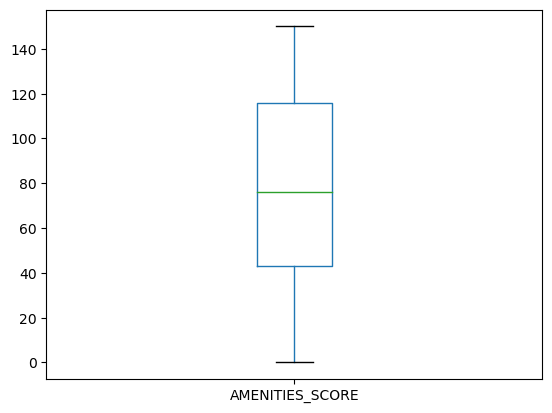

In [84]:
df["AMENITIES_SCORE"].plot.box()

<Axes: xlabel='AMENITIES_SCORE', ylabel='Count'>

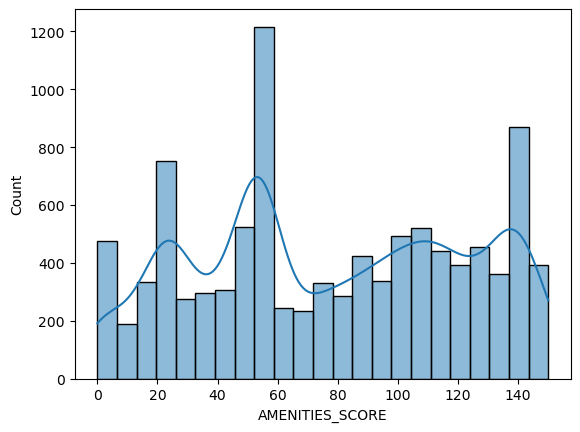

In [85]:
sns.histplot(df["AMENITIES_SCORE"], kde=True)

In [86]:
df["AMENITIES_SCORE"].sample()

5910    70
Name: AMENITIES_SCORE, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPID                        10152 non-null  int64  
 1   PROP_ID                     10152 non-null  object 
 2   CITY                        10152 non-null  object 
 3   PRICE                       10152 non-null  float64
 4   MAX_PRICE                   10152 non-null  int64  
 5   MIN_PRICE                   10152 non-null  int64  
 6   PRICE_SQFT                  10152 non-null  float64
 7   AREA                        10152 non-null  float64
 8   SECONDARY_AREA              10152 non-null  object 
 9   MAX_AREA_SQFT               10152 non-null  float64
 10  MIN_AREA_SQFT               10152 non-null  float64
 11  PRICE_PER_UNIT_AREA         10152 non-null  float64
 12  TOTAL_LANDMARK_COUNT        10041 non-null  float64
 13  FORMATTED_LANDMARK_DETAILS  101

## FEATURES

In [88]:
df['FEATURES'].value_counts().unique()

array([738, 515, 291, 267, 243, 142, 141,  99,  98,  67,  62,  55,  50,
        49,  40,  38,  37,  36,  34,  32,  31,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [89]:
df['FEATURES'].sample(5)

1485    44,23,45,24,46,25,47,26,28,30,31,10,32,33,12,1...
3973                         23,1,12,24,5,6,17,19,9,20,21
9203                                  23,24,25,26,6,19,32
9537    33,23,12,24,25,26,17,28,19,1,2,3,5,6,9,30,41,3...
755                   23,45,24,46,25,47,26,19,5,6,9,32,43
Name: FEATURES, dtype: object

In [90]:
df['FEATURES'] = df['FEATURES'].str.split(',')
df['FEATURES'].sample(5)

9040    [33, 23, 12, 24, 46, 26, 17, 29, 19, 1, 2, 3, ...
364     [33, 23, 45, 12, 46, 47, 25, 26, 29, 1, 3, 6, ...
301     [33, 12, 23, 24, 25, 47, 17, 19, 2, 3, 5, 6, 4...
2108    [44, 33, 23, 12, 24, 25, 47, 26, 17, 29, 19, 1...
3029                   [23, 24, 25, 26, 5, 6, 29, 19, 32]
Name: FEATURES, dtype: object

In [91]:
def eval_features(x):
    if isinstance(x, float):
        return []

    rv = []
    for i in literal_eval(x):
        if i.isnumeric():
            rv.append(int(i))
        else:
            rv.append(i)
    return rv

In [46]:
unique_features  = df['FEATURES'].explode().unique()
df["FEATURES"].sample(5)

2993                                              [23, 24]
5037     [44, 23, 45, 24, 46, 47, 25, 26, 29, 30, 31, 1...
1613     [44, 23, 45, 24, 46, 47, 25, 26, 28, 29, 30, 3...
5174                        [23, 24, 5, 17, 6, 19, 20, 21]
10110    [44, 23, 45, 24, 46, 25, 47, 26, 28, 29, 30, 3...
Name: FEATURES, dtype: object

In [92]:
unique_features = df["FEATURES"].explode().unique()
print(len(unique_features))
unique_features

35


array(['n', '23', '24', '5', '17', '6', '19', '20', '21', '33', '45',
       '12', '25', '47', '26', '28', '1', '3', '9', '40', '41', '42',
       '32', '29', '44', '46', '39', '8', '30', '10', '43', 'f', '31',
       '2', 'p'], dtype=object)

In [93]:
features_df = pd.read_csv("FEATURES.csv")
print(features_df.shape)
features_df

(14, 2)


,id,label
0,1,Swimming Pool
1,2,Power Backup
2,3,Club house
3,4,Parking
4,6,Park
5,9,Security Personnel
6,11,ATM
7,12,Gymnasium
8,21,Lift
9,25,Waste disposal


In [94]:
features_df["label"].values

array(['Swimming Pool', 'Power Backup', 'Club house', 'Parking', 'Park',
       'Security Personnel', 'ATM', 'Gymnasium', 'Lift', 'Waste disposal',
       'Gas Pipeline', 'DG Availability', 'Near bank',
       'Wheelchair Accessibility'], dtype=object)

In [95]:
features_values = {
    "Parking": 5,
    "Park": 7,
    "Power Backup": 9,
    "Lift": 8,
    "Gymnasium": 8,
    "Club house": 7,
    "Waste disposal": 5,
    "Swimming Pool": 8,
    "Security Personnel": 9,
    "Gas Pipeline": 6,
    "Near bank": 5,
    "DG Availability": 7,
    "Wheelchair Accessibility": 4,
    "ATM": 6,
}

In [51]:
features_df["values"] = features_df["label"].map(features_values, "ignore")
features_df

,id,label,values
0,1,Swimming Pool,8
1,2,Power Backup,9
2,3,Club house,7
3,4,Parking,5
4,6,Park,7
5,9,Security Personnel,9
6,11,ATM,6
7,12,Gymnasium,8
8,21,Lift,8
9,25,Waste disposal,5


## AGE

In [104]:
df['AGE'].value_counts()

1    3752
6    2238
2    1551
5    1013
0     990
3     608
Name: AGE, dtype: int64

In [105]:
def map_age_to_category(age):
    if age >= 0 and age <= 1:
        return "0-1 Year Old Property"
    elif age > 1 and age <= 5:
        return "1-5 Year Old Property"
    elif age > 5 and age <= 10:
        return "5-10 Year Old Property"
    elif age > 10:
        return "10+ Year Old Property"
    else:
        return "Undefined"

In [106]:
df['AGE'] =df['AGE'].apply(map_age_to_category)

In [107]:
df["AGE"].value_counts()

0-1 Year Old Property     4742
1-5 Year Old Property     3172
5-10 Year Old Property    2238
Name: AGE, dtype: int64

In [108]:
df["AGE"].isnull().sum()

0

In [109]:
df['AGE'].value_counts()

0-1 Year Old Property     4742
1-5 Year Old Property     3172
5-10 Year Old Property    2238
Name: AGE, dtype: int64

## FLOOR_NUM

In [110]:
print(df["FLOOR_NUM"].nunique())
df["FLOOR_NUM"].unique()

51


array(['1.0', '6.0', '2.0', '3.0', '4.0', nan, '1', '4', 'g', '2', '12',
       '17', '15', '3', '6', '28', '7', '16', '9', '14', '18', '8', '26',
       '24', '23', '19', '5', '10', '20', '22', '13', '11', '21', '30',
       '35', '32', '0', 'l', '27', '31', '25', '38', '29', '40', '39',
       'b', '33', '37', '34', '36', '41', '43'], dtype=object)

In [111]:
df["FLOOR_NUM"].value_counts()

2      1056
1      1021
3       672
4       641
7       487
10      467
6       466
8       462
5       454
9       385
g       373
12      309
11      287
15      209
14      198
18      125
16      123
20       94
17       86
13       62
19       57
1.0      45
22       45
25       40
21       36
23       31
24       26
30       24
26       22
27       19
l        18
28       16
29       12
31        7
32        6
39        5
33        5
b         5
35        5
2.0       4
38        3
36        2
34        2
4.0       2
0         2
37        1
43        1
6.0       1
41        1
40        1
3.0       1
Name: FLOOR_NUM, dtype: int64

<Axes: xlabel='FLOOR_NUM', ylabel='PRICE'>

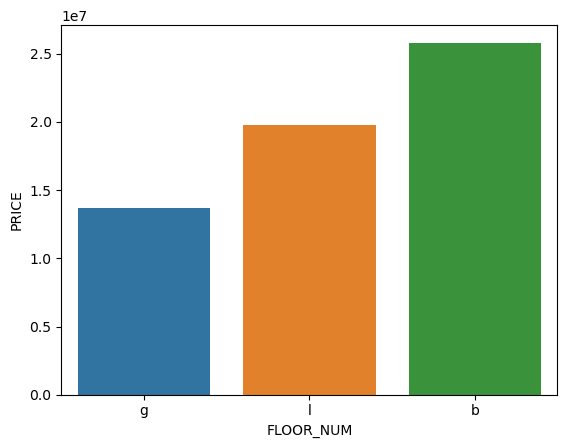

In [112]:
sns.barplot(
    df.query("FLOOR_NUM==['g','b','l','m',1]"),
    x="FLOOR_NUM",
    y="PRICE",
    estimator="median",
    errorbar=("ci", 0),
)

In [113]:
temp_cols = ["FLOOR_NUM", "TOTAL_FLOOR"]
for col in temp_cols:
    df[col] = df[col].apply(
        lambda x: "low rise" if pd.isna(x) else
                   "low rise" if x in ["g", "l", "b", "m"] else
                   "low rise" if float(x) == int(float(x)) and 1 <= int(float(x)) <= 3 else
                   "mid rise" if float(x) == int(float(x)) and 4 <= int(float(x)) <= 10 else
                   "high rise"
    )
    print(df[col].value_counts(dropna=False))


low rise     4925
mid rise     3365
high rise    1862
Name: FLOOR_NUM, dtype: int64
high rise    5483
mid rise     3146
low rise     1523
Name: TOTAL_FLOOR, dtype: int64


In [114]:
 df[["FLOOR_NUM", "TOTAL_FLOOR"]].value_counts()

FLOOR_NUM  TOTAL_FLOOR
mid rise   high rise      2855
low rise   mid rise       2635
high rise  high rise      1861
low rise   low rise       1523
           high rise       767
mid rise   mid rise        510
high rise  mid rise          1
dtype: int64

In [115]:

df.to_csv("gurgaon_10kAft_feature_eng.csv", index=False)

In [116]:
df.head()

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,PURPOSE,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE
0,70597758,h70597758,gurgaon,31900000.0,31900000,31900000,20202.0,1579.0,146.69 sq.m.,146.693837,146.693837,20202.0,9.0,"[1 metro station, 1 shopping, 2 connectivities...",3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,not available,0,1-5 Year Old Property,high rise,[n],3.0,[],la vida by tata housing,NaN,low rise,28.532594,77.020297,3.0,Sale,sector 113 gurgaon,la vida by tata housing,la vida by tata housing,NaN,2,0,1,2,1,2,0
1,70436188,h70436188,gurgaon,18500000.0,18500000,18500000,9135.0,2025.0,188.13 sq.m.,188.128575,188.128575,9135.0,12.0,"[1 metro station, 1 shopping, 1 connectivity, ...",3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,not available,0,5-10 Year Old Property,high rise,[n],3.0,[],emaar palm heights,NaN,low rise,28.385577,76.975992,3.0,Rent,sector 77 gurgaon,emaar palm heights,emaar palm heights,NaN,2,1,1,2,1,1,0
2,70217014,l70217014,gurgaon,120600000.0,120600992,120600992,42736.0,2822.0,262.17 sq.m.,262.172266,262.172266,42736.0,9.0,"[1 metro station, 1 shopping, 1 connectivity, ...",5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,not available,0,1-5 Year Old Property,high rise,[n],5.0,[],tulip monsella,NaN,low rise,28.435057,77.101367,5.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0
3,70217012,x70217012,gurgaon,95300000.0,95258544,95258544,42736.0,2229.0,207.08 sq.m.,207.080787,207.080787,42736.0,9.0,"[1 metro station, 1 shopping, 1 connectivity, ...",4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,not available,0,1-5 Year Old Property,high rise,[n],4.0,[],tulip monsella,NaN,low rise,28.435057,77.101367,4.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0
4,70217010,a70217010,gurgaon,72000000.0,72150764,71800092,43834.0,16381646.0,152.18-152.92 sq.m.,152.918338,152.175114,43834.0,9.0,"[1 metro station, 1 shopping, 1 connectivity, ...",3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,not available,0,1-5 Year Old Property,high rise,[n],3.0,[],tulip monsella,NaN,low rise,28.435057,77.101367,3.0,Unknown,sector 53 gurgaon,tulip monsella,tulip monsella,NaN,1,2,1,2,1,1,0


In [117]:
drop_cols = "FORMATTED_LANDMARK_DETAILS AMENITIES FEATURES PURPOSE".split()
df.drop(columns=drop_cols, inplace=True)
df.shape


(10152, 38)

In [118]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SPID                  10152 non-null  int64  
 1   PROP_ID               10152 non-null  object 
 2   CITY                  10152 non-null  object 
 3   PRICE                 10152 non-null  float64
 4   MAX_PRICE             10152 non-null  int64  
 5   MIN_PRICE             10152 non-null  int64  
 6   PRICE_SQFT            10152 non-null  float64
 7   AREA                  10152 non-null  float64
 8   SECONDARY_AREA        10152 non-null  object 
 9   MAX_AREA_SQFT         10152 non-null  float64
 10  MIN_AREA_SQFT         10152 non-null  float64
 11  PRICE_PER_UNIT_AREA   10152 non-null  float64
 12  TOTAL_LANDMARK_COUNT  10041 non-null  float64
 13  PROP_HEADING          10152 non-null  object 
 14  DESCRIPTION           10152 non-null  object 
 15  PROPERTY_TYPE      

In [120]:
df.to_csv("gurgaon_10k_After_feature_eng_V3.csv", index=False)